# Total population supplied by water supply industry

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Total population supplied by water supply industry.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df = df[:880]                                   # select index position 0-879
df

,Country or Area,Year,Value,Value Footnotes,Unit
0,Albania,2015,82.0,NaN,%
1,Albania,2014,81.0,NaN,%
2,Algeria,2015,98.0,NaN,%
3,Algeria,2014,98.0,NaN,%
4,Algeria,2013,98.0,NaN,%
...,...,...,...,...,...
875,Yemen,2003,15.9,20,%
876,Yemen,2002,14.8,20,%
877,Yemen,2001,14.4,20,%
878,Yemen,2000,14.3,20,%


In [5]:
df.shape

(880, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  880 non-null    object 
 1   Year             880 non-null    object 
 2   Value            880 non-null    float64
 3   Value Footnotes  151 non-null    object 
 4   Unit             880 non-null    object 
dtypes: float64(1), object(4)
memory usage: 34.5+ KB


In [7]:
df.rename(columns=
    {
        'Country or Area': 'Country_or_Area', 
        'Value': 'PctSupplied'
    }, 
    inplace=True
)

df.head()

,Country_or_Area,Year,PctSupplied,Value Footnotes,Unit
0,Albania,2015,82.0,NaN,%
1,Albania,2014,81.0,NaN,%
2,Algeria,2015,98.0,NaN,%
3,Algeria,2014,98.0,NaN,%
4,Algeria,2013,98.0,NaN,%


In [8]:
df1 = df[['Country_or_Area', 'Year', 'PctSupplied', 'Unit']]
df1

,Country_or_Area,Year,PctSupplied,Unit
0,Albania,2015,82.0,%
1,Albania,2014,81.0,%
2,Algeria,2015,98.0,%
3,Algeria,2014,98.0,%
4,Algeria,2013,98.0,%
...,...,...,...,...
875,Yemen,2003,15.9,%
876,Yemen,2002,14.8,%
877,Yemen,2001,14.4,%
878,Yemen,2000,14.3,%


In [9]:
df1['PctSupplied'] = df1['PctSupplied'].apply(lambda x: np.round(x, 2))      # round percentage supplied to 2 dp
df1['PctSupplied']

0      82.0
1      81.0
2      98.0
3      98.0
4      98.0
       ... 
875    15.9
876    14.8
877    14.4
878    14.3
879    14.0
Name: PctSupplied, Length: 880, dtype: float64

In [10]:
df1.describe(include='object')

,Country_or_Area,Year,Unit
count,880,880,880
unique,93,24,1
top,Singapore,2012,%
freq,22,60,880


In [11]:
df1['Country_or_Area'].value_counts()

Singapore                                         22
Andorra                                           22
Tunisia                                           22
Monaco                                            22
China, Hong Kong Special Administrative Region    19
                                                  ..
Switzerland                                        1
Nigeria                                            1
Croatia                                            1
Central African Republic                           1
Guadeloupe                                         1
Name: Country_or_Area, Length: 93, dtype: int64

In [12]:
df1['Year'].value_counts().head()

2012    60
2011    56
2005    56
2010    55
2008    55
Name: Year, dtype: int64

In [13]:
df1['PctSupplied'].value_counts()

100.00    164
99.90      40
95.00      22
99.00      19
31.00      14
         ... 
72.67       1
71.82       1
69.38       1
71.75       1
14.00       1
Name: PctSupplied, Length: 369, dtype: int64

<AxesSubplot:xlabel='PctSupplied', ylabel='Density'>

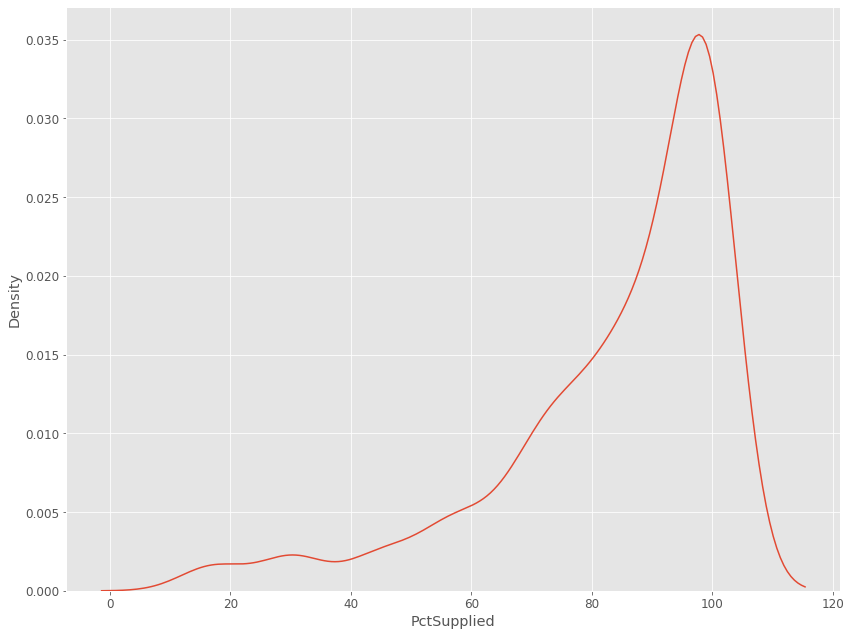

In [14]:
sns.kdeplot(data=df1, x='PctSupplied')

# Missing Values Exploration

In [15]:
df1.isna().sum()

Country_or_Area    0
Year               0
PctSupplied        0
Unit               0
dtype: int64

# Grouping and Aggregation

In [16]:
country_area_grouped = df1.groupby('Country_or_Area')
country_area_grouped.head()

,Country_or_Area,Year,PctSupplied,Unit
0,Albania,2015,82.0,%
1,Albania,2014,81.0,%
2,Algeria,2015,98.0,%
3,Algeria,2014,98.0,%
4,Algeria,2013,98.0,%
...,...,...,...,...
865,Yemen,2013,18.6,%
866,Yemen,2012,18.5,%
867,Yemen,2011,18.6,%
868,Yemen,2010,18.6,%


# Data Visualization

In [17]:
# line chart helper function
def plot_line(data, x, y, hue=None, style=None, size=None, title=None, xlabel=None, ylabel=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y,
        hue=hue, style=style, size=size,
        ax=ax)

    # lable plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # despine axis
    sns.despine(bottom=True, left=True)

    return plot_line

<function __main__.plot_line(data, x, y, hue=None, style=None, size=None, title=None, xlabel=None, ylabel=None)>

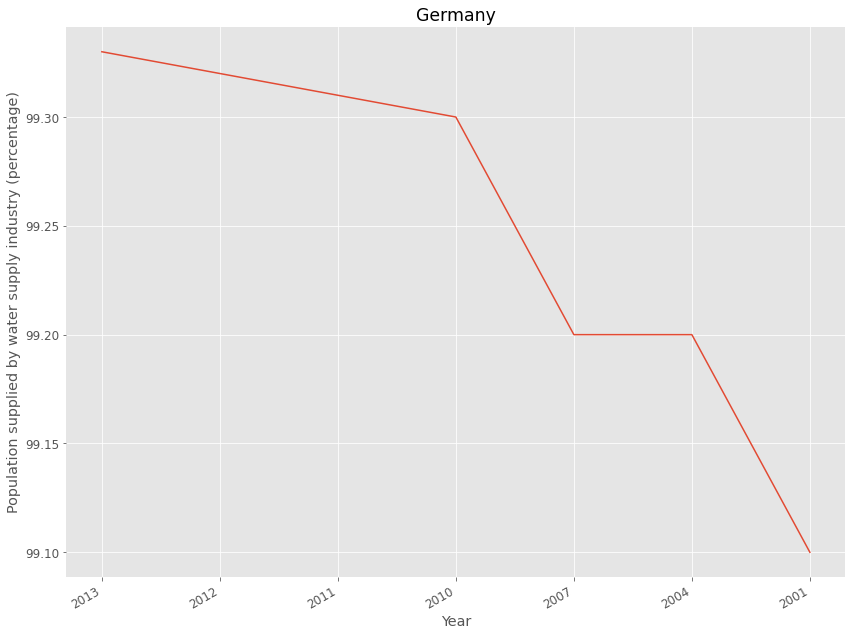

In [18]:
plot_line(
    data=country_area_grouped.get_group('Germany'),
    x='Year', y='PctSupplied',
    title='Germany', xlabel='Year', ylabel='Population supplied by water supply industry (percentage)'
)

<function __main__.plot_line(data, x, y, hue=None, style=None, size=None, title=None, xlabel=None, ylabel=None)>

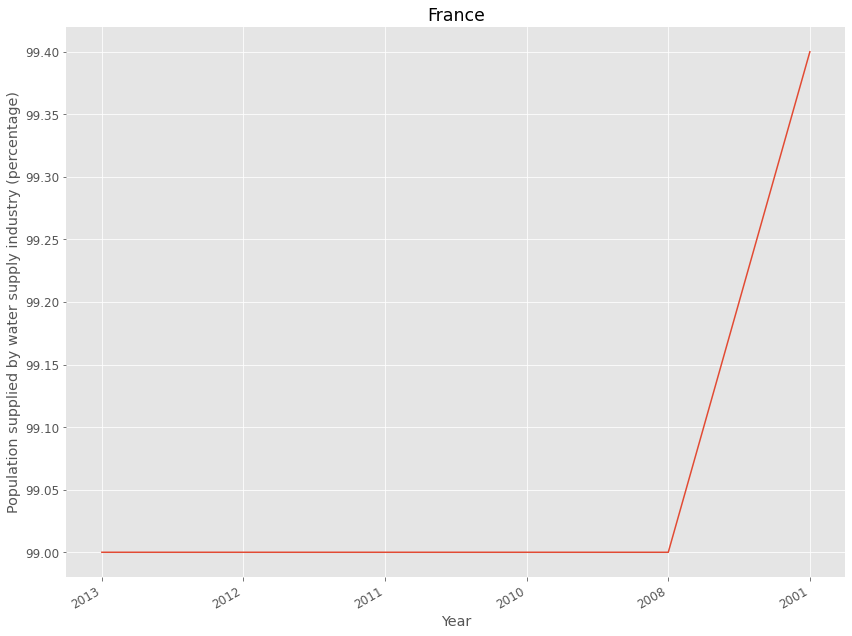

In [19]:
plot_line(
    data=country_area_grouped.get_group('France'),
    x='Year', y='PctSupplied',
    title='France', xlabel='Year', ylabel='Population supplied by water supply industry (percentage)'
)

<function __main__.plot_line(data, x, y, hue=None, style=None, size=None, title=None, xlabel=None, ylabel=None)>

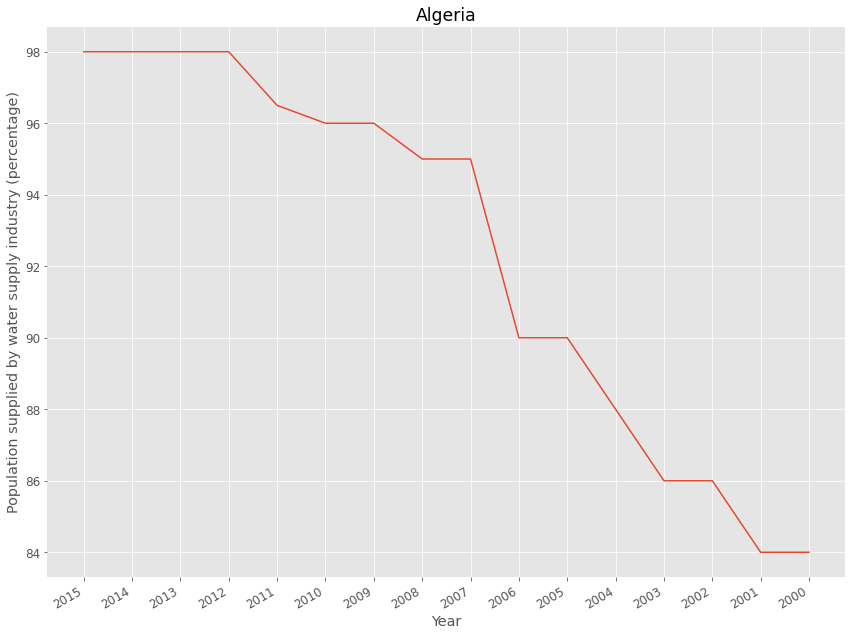

In [20]:
plot_line(
    data=country_area_grouped.get_group('Algeria'),
    x='Year', y='PctSupplied',
    title='Algeria', xlabel='Year', ylabel='Population supplied by water supply industry (percentage)'
)

<function __main__.plot_line(data, x, y, hue=None, style=None, size=None, title=None, xlabel=None, ylabel=None)>

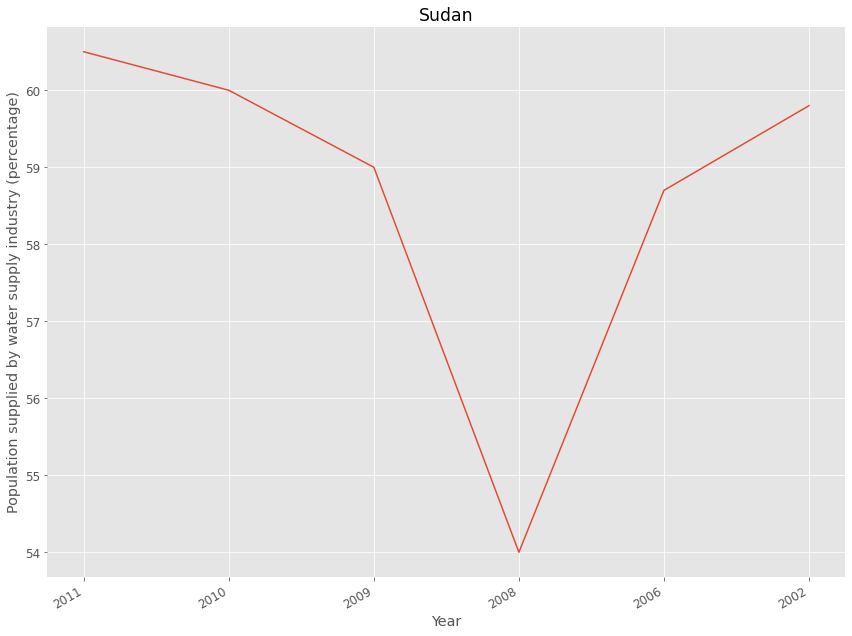

In [21]:
plot_line(
    data=country_area_grouped.get_group('Sudan'),
    x='Year', y='PctSupplied',
    title='Sudan', xlabel='Year', ylabel='Population supplied by water supply industry (percentage)'
)